### Comparison of real and modeled distributions

Script to perform a comparison of the output of all simulations with real-world GATE-Israel values

In [57]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np
from scipy.stats import ks_2samp

In [2]:
gate_gtd = pd.read_stata('./real_data/GATE_GTD_Israel_monthly_data_ext.dta')
gate_gtd.head()

,year,month,concil,repress,concdisc,concindisc,reprdisc,reprindisc,mcount,att93miss,...,r_atppl3,e_atppl3,s_atppl4,r_atppl4,e_atppl4,att_pal,att_unk,att_palunk,att_tot,_merge
0,1988.0,1.0,2.0,18.0,0.0,2.0,4.0,14.0,1960-09-01,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,master only (1)
1,1989.0,1.0,3.0,1.0,0.0,3.0,0.0,1.0,1961-09-01,9.0,...,NaN,NaN,NaN,NaN,NaN,4.0,5.0,9.0,11.0,matched (3)
2,1990.0,1.0,6.0,21.0,3.0,3.0,8.0,13.0,1962-09-01,14.0,...,NaN,NaN,NaN,NaN,NaN,9.0,5.0,14.0,14.0,matched (3)
3,1991.0,1.0,0.0,5.0,0.0,0.0,0.0,5.0,1963-09-01,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,master only (1)
4,1992.0,1.0,6.0,21.0,1.0,5.0,5.0,16.0,1964-09-01,7.0,...,NaN,NaN,NaN,NaN,NaN,7.0,0.0,7.0,8.0,matched (3)


##### Examine real-world recorded attacks

In [3]:
att_dates = gate_gtd[gate_gtd['year'].notna()]
att_dates['attack_date'] = pd.to_datetime(att_dates['year'].astype('int').astype('str') + '-' + att_dates['month'].astype('int').astype('str') + '-01')

att_dates = att_dates.loc[:,('att_palunk','att_pal','att_unk','attack_date')]
att_dates_plt = att_dates.melt(id_vars=['attack_date'])
att_dates_plt.rename(columns={'variable':'actor','value':'attacks'},inplace=True)

/tmp/ipykernel_4383/2074339646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  att_dates['attack_date'] = pd.to_datetime(att_dates['year'].astype('int').astype('str') + '-' + att_dates['month'].astype('int').astype('str') + '-01')


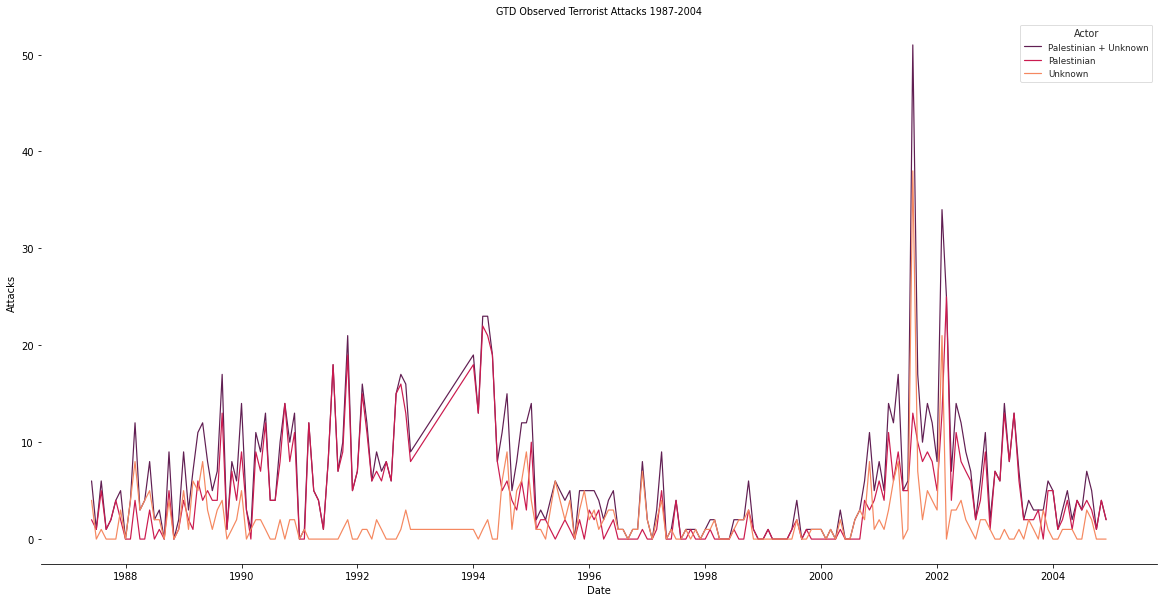

In [4]:
f, ax = plt.subplots(1,1,figsize=(20,10))
sns.set_style('white')
sns.despine(left=True)
sns.set_context('paper')
#palette = sns.color_palette('rocket',as_cmap=True)

sns.lineplot(data=att_dates_plt, x="attack_date", y="attacks", ax=ax, hue='actor',palette='rocket')
ax.set(ylabel="Attacks", xlabel="Date", title="GTD Observed Terrorist Attacks 1987-2004")
ax.legend(title="Actor", labels=['Palestinian + Unknown','Palestinian','Unknown'])

##### Examine real-world government actions

In [5]:
actions_df = gate_gtd[gate_gtd['year'].notna()]
actions_df['month_date'] = pd.to_datetime(actions_df['year'].astype('int').astype('str') + '-' + actions_df['month'].astype('int').astype('str') + '-01')
actions_df = actions_df.loc[:,('month_date','concil','repress','concdisc','concindisc','reprdisc','reprindisc')]
actions_df_plt = actions_df.melt(id_vars=['month_date'])
actions_df_plt.rename(columns={'variable':'action_type','value':'actions'},inplace=True)

/tmp/ipykernel_4383/2061595547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actions_df['month_date'] = pd.to_datetime(actions_df['year'].astype('int').astype('str') + '-' + actions_df['month'].astype('int').astype('str') + '-01')


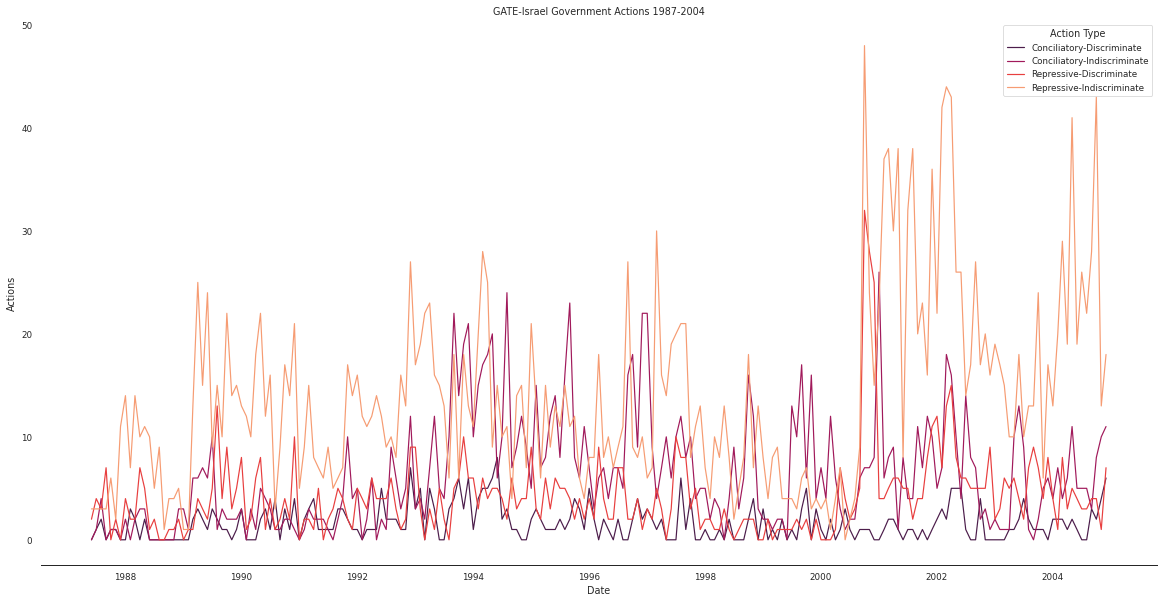

In [7]:
f, ax = plt.subplots(1,1,figsize=(20,10))
sns.set_style('white')
sns.despine(left=True)
sns.set_context('paper')

sns.lineplot(data=actions_df_plt[~actions_df_plt['action_type'].isin(['concil','repress'])], x="month_date", \
    y="actions", ax=ax, hue='action_type',palette='rocket')
ax.set(ylabel="Actions", xlabel="Date", title="GATE-Israel Government Actions 1987-2004")
ax.legend(title="Action Type",labels=['Conciliatory-Discriminate','Conciliatory-Indiscriminate','Repressive-Discriminate','Repressive-Indiscriminate'])

##### Bring in modeled data

In [35]:
#full_models_df = pd.read_pickle('./model_output/full_models_df.pkl')
full_models_df = pd.read_pickle('./../full_models_df.pkl')
param_vals = {'prob_violence':[],'govt_policy':[],'reactive_lvl':[],'discontent':[],'starting_population':[],'steps':[]}
for params in full_models_df['params']:
    #print(params)
    #print(type(params))
    param_dict = ast.literal_eval(params)
    #print(param_dict)
    param_vals['prob_violence'].append(param_dict[0])
    param_vals['govt_policy'].append(param_dict[1])
    param_vals['reactive_lvl'].append(param_dict[2])
    param_vals['discontent'].append(param_dict[3])
    param_vals['starting_population'].append(param_dict[4])
    param_vals['steps'].append(param_dict[5])

In [36]:
full_models_df.head()

,num_agents,num_attacks,params
0,300,158,"(0.0001, 'CONC', 'mid-high', 'high', 300, 200)"
1,145,159,"(0.0001, 'CONC', 'mid-high', 'high', 300, 200)"
2,145,166,"(0.0001, 'CONC', 'mid-high', 'high', 300, 200)"
3,142,174,"(0.0001, 'CONC', 'mid-high', 'high', 300, 200)"
4,135,174,"(0.0001, 'CONC', 'mid-high', 'high', 300, 200)"


In [27]:
params_df.head()

,prob_violence,govt_policy,reactive_lvl,discontent,starting_population,steps
0,0.0001,NONE,high,high,200,200
1,0.0001,NONE,high,high,200,200
2,0.0001,NONE,high,high,200,200
3,0.0001,NONE,high,high,200,200
4,0.0001,NONE,high,high,200,200


In [41]:
params_df = pd.DataFrame.from_dict(param_vals)
full_model_results = full_models_df.join(params_df)
print(full_model_results.shape)
full_model_results.head()

(16800, 9)


,num_agents,num_attacks,params,prob_violence,govt_policy,reactive_lvl,discontent,starting_population,steps
0,300,158,"(0.0001, 'CONC', 'mid-high', 'high', 300, 200)",0.0001,CONC,mid-high,high,300,200
1,145,159,"(0.0001, 'CONC', 'mid-high', 'high', 300, 200)",0.0001,CONC,mid-high,high,300,200
2,145,166,"(0.0001, 'CONC', 'mid-high', 'high', 300, 200)",0.0001,CONC,mid-high,high,300,200
3,142,174,"(0.0001, 'CONC', 'mid-high', 'high', 300, 200)",0.0001,CONC,mid-high,high,300,200
4,135,174,"(0.0001, 'CONC', 'mid-high', 'high', 300, 200)",0.0001,CONC,mid-high,high,300,200


In [42]:
# identify models which result in 0 population
zero_fin_pop_params = full_model_results[full_model_results['num_agents'] == 0]['params'].unique()
len(zero_fin_pop_params)

21

In [43]:
# filter to exclude models which don't have any population by the end
full_potential_models = full_model_results[~full_model_results['params'].isin(zero_fin_pop_params)]
full_potential_models.shape

(9000, 9)

In [44]:
# create count of new attacks each step from cumulative counts in dataset
full_potential_models['new_attacks'] = full_potential_models.groupby('params')['num_attacks'].diff()
full_potential_models_skipfirst = full_potential_models.dropna()
full_potential_models_skipfirst = full_potential_models_skipfirst.reset_index().drop(columns=['index'])
full_potential_models_skipfirst.head()

/tmp/ipykernel_4383/671348241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_potential_models['new_attacks'] = full_potential_models.groupby('params')['num_attacks'].diff()


,num_agents,num_attacks,params,prob_violence,govt_policy,reactive_lvl,discontent,starting_population,steps,new_attacks
0,143,166,"(0.0001, 'CONC', 'none', 'high', 300, 200)",0.0001,CONC,none,high,300,200,5
1,142,168,"(0.0001, 'CONC', 'none', 'high', 300, 200)",0.0001,CONC,none,high,300,200,2
2,144,169,"(0.0001, 'CONC', 'none', 'high', 300, 200)",0.0001,CONC,none,high,300,200,1
3,145,171,"(0.0001, 'CONC', 'none', 'high', 300, 200)",0.0001,CONC,none,high,300,200,2
4,144,172,"(0.0001, 'CONC', 'none', 'high', 300, 200)",0.0001,CONC,none,high,300,200,1


In [47]:
full_models_df[full_models_df['params'] == param_combos[0]]

,num_agents,num_attacks,params
4200,300,161,"(0.0001, 'CONC', 'none', 'high', 300, 200)"
4201,143,166,"(0.0001, 'CONC', 'none', 'high', 300, 200)"
4202,142,168,"(0.0001, 'CONC', 'none', 'high', 300, 200)"
4203,144,169,"(0.0001, 'CONC', 'none', 'high', 300, 200)"
4204,145,171,"(0.0001, 'CONC', 'none', 'high', 300, 200)"
...,...,...,...
4395,367,782,"(0.0001, 'CONC', 'none', 'high', 300, 200)"
4396,356,796,"(0.0001, 'CONC', 'none', 'high', 300, 200)"
4397,343,799,"(0.0001, 'CONC', 'none', 'high', 300, 200)"
4398,349,802,"(0.0001, 'CONC', 'none', 'high', 300, 200)"


In [54]:
# create dummy dates to align with true data - considering whole 1988-2004 period
param_combos = full_potential_models_skipfirst['params'].unique()

for param in param_combos:
    param_df = full_potential_models_skipfirst[full_potential_models_skipfirst['params']==param]
    #print(param_df.index)
    full_potential_models_skipfirst.loc[param_df.index, 'dummy_date'] = pd.date_range(start='01/01/1988',end='09/01/2004',periods=param_df['steps'].mean() - 1)

full_potential_models_skipfirst.head()

,num_agents,num_attacks,params,prob_violence,govt_policy,reactive_lvl,discontent,starting_population,steps,new_attacks,dummy_date
0,143,166,"(0.0001, 'CONC', 'none', 'high', 300, 200)",0.0001,CONC,none,high,300,200,5,1988-01-01 00:00:00.000000000
1,142,168,"(0.0001, 'CONC', 'none', 'high', 300, 200)",0.0001,CONC,none,high,300,200,2,1988-01-31 17:56:21.818181818
2,144,169,"(0.0001, 'CONC', 'none', 'high', 300, 200)",0.0001,CONC,none,high,300,200,1,1988-03-02 11:52:43.636363636
3,145,171,"(0.0001, 'CONC', 'none', 'high', 300, 200)",0.0001,CONC,none,high,300,200,2,1988-04-02 05:49:05.454545454
4,144,172,"(0.0001, 'CONC', 'none', 'high', 300, 200)",0.0001,CONC,none,high,300,200,1,1988-05-02 23:45:27.272727272


In [55]:
# filter out models which result in no attacks by the equivalent of the last 3 years
final_years_means = full_potential_models_skipfirst[full_potential_models_skipfirst['dummy_date'] >= '01-01-2001'].groupby(['params'])['new_attacks','num_attacks'].sum()
print(final_years_means.shape)
print(final_years_means[final_years_means['new_attacks'] != 0].shape)
attacks_at_end = final_years_means[final_years_means['new_attacks'] != 0].index
final_years_means.head()

(27, 2)
(24, 2)


/tmp/ipykernel_4383/717532975.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_years_means = full_potential_models_skipfirst[full_potential_models_skipfirst['dummy_date'] >= '01-01-2001'].groupby(['params'])['new_attacks','num_attacks'].sum()


,new_attacks,num_attacks
params,,
"(0.0001, 'CONC', 'none', 'high', 300, 200)",270,29125
"(0.0001, 'CONC', 'none', 'high', 300, 500)",658,231915
"(0.0001, 'CONC', 'none', 'high', 600, 200)",470,50921
"(0.0001, 'CONC', 'none', 'high', 600, 500)",1212,476469
"(0.0001, 'CONC', 'none', 'low', 300, 200)",493,49008


In [107]:
full_models = full_potential_models_skipfirst[full_potential_models_skipfirst['params'].isin(attacks_at_end)]
print(full_potential_models_skipfirst.shape)
print(full_models.shape)
full_models.head()

(8973, 11)
(8376, 11)


,num_agents,num_attacks,params,prob_violence,govt_policy,reactive_lvl,discontent,starting_population,steps,new_attacks,dummy_date
0,143,166,"(0.0001, 'CONC', 'none', 'high', 300, 200)",0.0001,CONC,none,high,300,200,5,1988-01-01 00:00:00.000000000
1,142,168,"(0.0001, 'CONC', 'none', 'high', 300, 200)",0.0001,CONC,none,high,300,200,2,1988-01-31 17:56:21.818181818
2,144,169,"(0.0001, 'CONC', 'none', 'high', 300, 200)",0.0001,CONC,none,high,300,200,1,1988-03-02 11:52:43.636363636
3,145,171,"(0.0001, 'CONC', 'none', 'high', 300, 200)",0.0001,CONC,none,high,300,200,2,1988-04-02 05:49:05.454545454
4,144,172,"(0.0001, 'CONC', 'none', 'high', 300, 200)",0.0001,CONC,none,high,300,200,1,1988-05-02 23:45:27.272727272


In [ ]:
# normalize each scenario's values
param_combos = full_models['params'].unique()

for param in param_combos:
    param_df = full_models[full_models['params']==param]
    #print(param_df.index)
    full_models.loc[param_df.index, 'new_attacks_norm'] = (param_df['new_attacks'] - \
    param_df['new_attacks'].mean()) / param_df['new_attacks'].std()

full_models.head(2)

In [60]:
# normalize GTD attack counts
att_dates['palunk_att_norm'] = (att_dates['att_palunk'] - \
    att_dates['att_palunk'].mean()) / att_dates['att_palunk'].std()
att_dates.head()

,att_palunk,att_pal,att_unk,attack_date,palunk_att_norm
0,0.0,0.0,0.0,1988-01-01,-0.964136
1,9.0,4.0,5.0,1989-01-01,0.407403
2,14.0,9.0,5.0,1990-01-01,1.169370
3,0.0,0.0,0.0,1991-01-01,-0.964136
4,7.0,7.0,0.0,1992-01-01,0.102617


In [112]:
full_models_comp = full_models.loc[:,('dummy_date','new_attacks','params')]
monthly_models_comp = pd.DataFrame(columns=['dummy_date','new_attacks','params'])
param_combos = full_models_comp['params'].unique()

for param in param_combos:    
    model_single = full_models_comp[full_models_comp['params']==param]
    #print(model_single)
    monthly_model_single = model_single.groupby(pd.Grouper(key='dummy_date',freq="M")).sum().reset_index()
    #print(monthly_model_single)
    monthly_model_single = monthly_model_single[monthly_model_single['params']!=0]
    monthly_models_comp = pd.concat([monthly_models_comp, monthly_model_single])

monthly_models_comp = monthly_models_comp.reset_index()

In [113]:
monthly_models_comp.head()

,index,dummy_date,new_attacks,params
0,0,1988-01-31,7,"(0.0001, 'CONC', 'none', 'high', 300, 200)(0.0..."
1,2,1988-03-31,1,"(0.0001, 'CONC', 'none', 'high', 300, 200)"
2,3,1988-04-30,2,"(0.0001, 'CONC', 'none', 'high', 300, 200)"
3,4,1988-05-31,1,"(0.0001, 'CONC', 'none', 'high', 300, 200)"
4,5,1988-06-30,0,"(0.0001, 'CONC', 'none', 'high', 300, 200)"


In [114]:
# normalize each scenario's values
param_combos = monthly_models_comp['params'].unique()

for param in param_combos:
    param_df = monthly_models_comp[monthly_models_comp['params']==param]
    #print(param_df.index)
    monthly_models_comp.loc[param_df.index, 'new_attacks_norm'] = (param_df['new_attacks'] - \
    param_df['new_attacks'].mean()) / param_df['new_attacks'].std()

monthly_models_comp.head(2)

,index,dummy_date,new_attacks,params,new_attacks_norm
0,0,1988-01-31,7,"(0.0001, 'CONC', 'none', 'high', 300, 200)(0.0...",-0.707107
1,2,1988-03-31,1,"(0.0001, 'CONC', 'none', 'high', 300, 200)",-0.757297


In [115]:
# calculate K-S test statistics comparing modeled results with GTD
obs_attacks = att_dates['palunk_att_norm']
param_combos = monthly_models_comp['params'].unique()
ks_results_stat = {}
ks_results_pval = {}

for param in param_combos:
    param_df = monthly_models_comp[monthly_models_comp['params'] == param]
    mod_np = np.array(param_df['new_attacks_norm'])
    #print('modeled attacks shape',mod_np.shape)
    ks_results = ks_2samp(obs_attacks, mod_np)
    ks_results_stat[param] = ks_results[0]
    ks_results_pval[ks_results[1]] = param

In [101]:
# 5% significance level
ks_results_p05 = [{val, key} for val, key in ks_results_pval.items() if val < 0.05]
print(len(ks_results_p05))
ks_results_p05[0:2]

7


[{"(0.0001, 'CONC', 'none', 'mid', 300, 500)(0.0001, 'CONC', 'none', 'mid', 300, 500)(0.0001, 'CONC', 'none', 'mid', 300, 500)",
  0.010281915063630409},
 {"(0.0001, 'CONC', 'none', 'mid', 600, 500)(0.0001, 'CONC', 'none', 'mid', 600, 500)",
  0.0009426873352628151}]

In [100]:
# 1% significance level
ks_results_p01 = {val: key for val, key in ks_results_pval.items() if val < 0.01}
print(len(ks_results_p01))
ks_results_p01

5


{0.0009426873352628151: "(0.0001, 'CONC', 'none', 'mid', 600, 500)(0.0001, 'CONC', 'none', 'mid', 600, 500)",
 0.0011567411722670506: "(0.0001, 'CONC', 'none', 'low', 600, 500)(0.0001, 'CONC', 'none', 'low', 600, 500)(0.0001, 'CONC', 'none', 'low', 600, 500)",
 0.0017712217944194641: "(0.0001, 'CONC', 'none', 'low', 600, 500)(0.0001, 'CONC', 'none', 'low', 600, 500)",
 0.00046398398997526957: "(0.003, 'CONC', 'none', 'mid', 600, 500)(0.003, 'CONC', 'none', 'mid', 600, 500)(0.003, 'CONC', 'none', 'mid', 600, 500)",
 0.0032367034217987145: "(0.003, 'CONC', 'none', 'mid', 600, 500)(0.003, 'CONC', 'none', 'mid', 600, 500)"}

In [121]:
model_results_ks_good = monthly_models_comp[monthly_models_comp['params'].isin(ks_results_p01.values())]
model_results_ks_good['param_id'], uniques = pd.factorize(model_results_ks_good['params'])
model_results_ks_good['param_id'] = model_results_ks_good['param_id'] + 1
model_results_ks_good['new_attacks_norm'] = model_results_ks_good['new_attacks_norm'].astype('float')
print(model_results_ks_good.shape)
model_results_ks_good.head(2)

(502, 6)


/tmp/ipykernel_4383/2465650635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_results_ks_good['param_id'], uniques = pd.factorize(model_results_ks_good['params'])
/tmp/ipykernel_4383/2465650635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_results_ks_good['param_id'] = model_results_ks_good['param_id'] + 1
/tmp/ipykernel_4383/2465650635.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,index,dummy_date,new_attacks,params,new_attacks_norm,param_id
1392,1,1988-02-29,8,"(0.0001, 'CONC', 'none', 'mid', 600, 500)(0.00...",-0.615314,1
1394,3,1988-04-30,2,"(0.0001, 'CONC', 'none', 'mid', 600, 500)(0.00...",-0.714100,1


In [131]:
comp_id = 2
to_stack = model_results_ks_good[model_results_ks_good['param_id']==comp_id]
to_stack = to_stack.loc[:,('dummy_date','new_attacks_norm')].rename(columns={'dummy_date':'attack_date',\
                        'new_attacks_norm':'attacks_norm'})
to_stack['source'] = 'model'

stacked_df = att_dates.loc[:,('attack_date','palunk_att_norm')].\
                        rename(columns={'palunk_att_norm':'attacks_norm'})
stacked_df['source'] = 'observed'

viz_compare = pd.concat([to_stack,stacked_df])
print(viz_compare.shape)
viz_compare.head()

(309, 3)


,attack_date,attacks_norm,source
2187,1988-01-31,-0.749236,model
2189,1988-03-31,-0.758302,model
2191,1988-05-31,-0.785500,model
2193,1988-07-31,-0.676709,model
2195,1988-09-30,-0.776434,model


<AxesSubplot:xlabel='attacks_norm', ylabel='Count'>

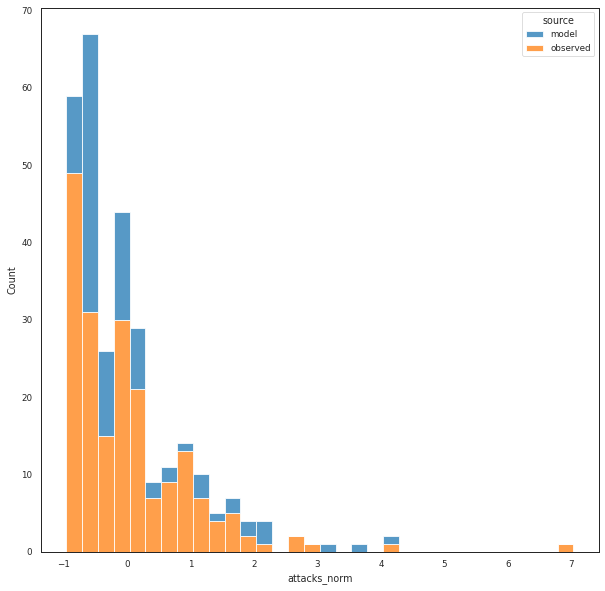

In [134]:
f, ax = plt.subplots(1,1,figsize=(10,10))

sns.histplot(viz_compare, multiple='stack',\
    x="attacks_norm",binwidth=0.25,
    hue='source')